In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

In [24]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
df=pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


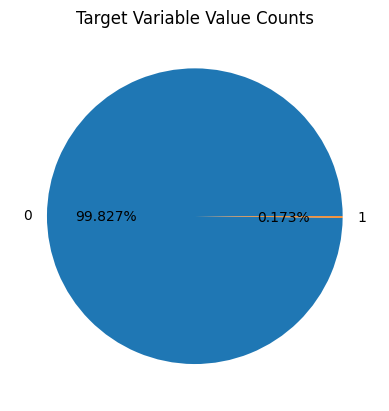

In [25]:
labels = df.Class.unique()

sizes = df.Class.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct="%1.3f%%")
ax.set_title("Target Variable Value Counts")
plt.show()

<Axes: >

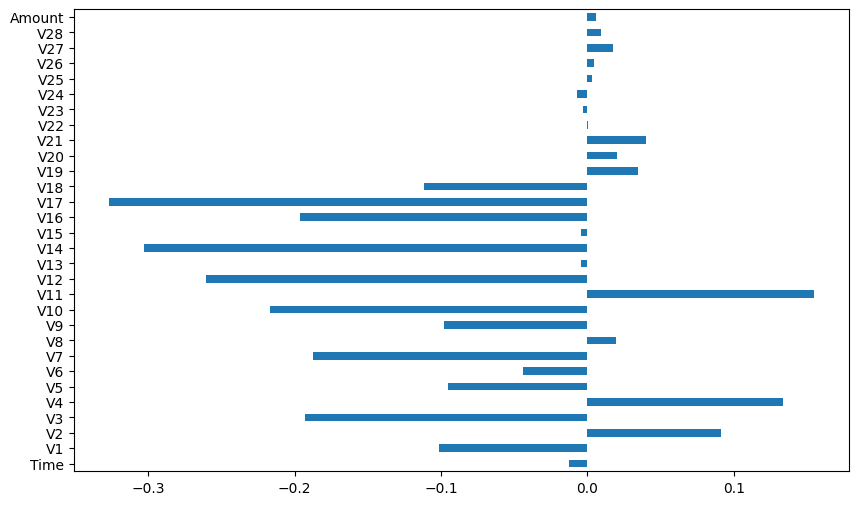

In [26]:
corr_values = df.corr()['Class'].drop('Class')
corr_values.plot(kind='barh', figsize=(10, 6))

In [27]:
df.iloc[:, 1:30]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [28]:
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])

data_matrix = df.values

X = data_matrix[:, 1:30]
y = data_matrix[:, 30]

X = normalize(X, norm='l1')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
w_train = compute_sample_weight('balanced', y_train)

In [31]:
dt = DecisionTreeClassifier(max_depth=4, random_state=35)
dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [32]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss='hinge', fit_intercept=False)
svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [33]:
y_pred_dt = dt.predict_proba(X_test)[:, 1]

roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print("Decision Tree ROC-AUC: %0.3f" % roc_auc_dt)

Decision Tree ROC-AUC: 0.939


In [34]:
y_pred_svm = svm.decision_function(X_test)

roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC: %0.3f" % roc_auc_svm)

SVM ROC-AUC: 0.986


<Axes: >

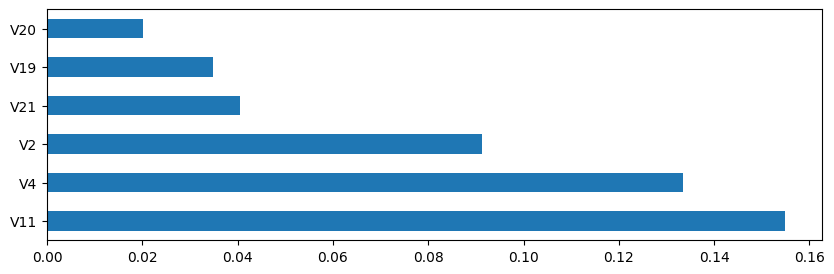

In [35]:
corr_val6 = df.corr()['Class'].drop('Class')
corr_val6 = corr_val6.sort_values(ascending=False)[:6]
corr_val6.plot(kind='barh', figsize=(10, 3))

In [37]:
X = data_matrix[:, [3, 10 ,12, 14, 16, 17]]
y = data_matrix[:, 30]
X = normalize(X, norm='l1')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
w_train = compute_sample_weight('balanced', y_train)

dt = DecisionTreeClassifier(max_depth=4, random_state=35)
dt.fit(X_train, y_train, sample_weight=w_train)

svm = LinearSVC(class_weight='balanced', random_state=31, loss='hinge', fit_intercept=False)
svm.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print("Decision Tree ROC-AUC: %0.3f" % roc_auc_dt)

y_pred_svm = svm.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC: %0.3f" % roc_auc_svm)

Decision Tree ROC-AUC: 0.952
SVM ROC-AUC: 0.937


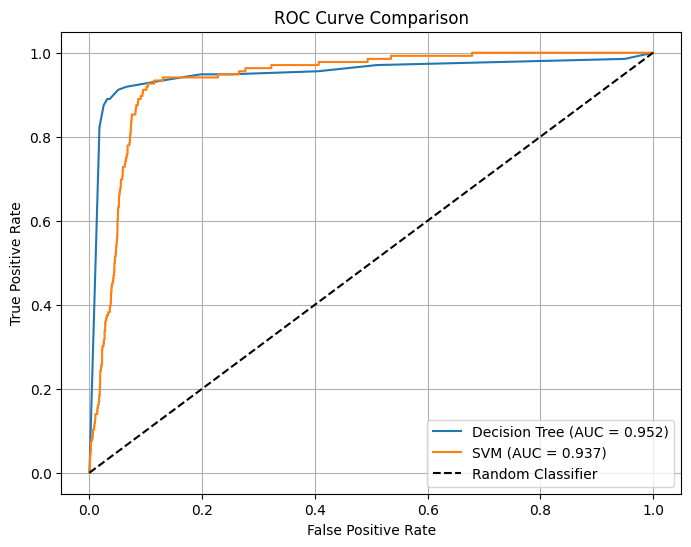

In [38]:
from sklearn.metrics import roc_curve

# Compute ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)

# Compute ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.3f)' % roc_auc_dt)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.3f)' % roc_auc_svm)

# Add chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


- With a larger set of features, SVM performed relatively better in comparison to the Decision Trees.
- Decision Trees benefited from feature selection and performed better.
- SVMs may require higher feature dimensionality to create an efficient decision hyperplane.